In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('STB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2018,11750,11700,12000,11700,4.31M,0.0000
1,06/04/2018,12550,12000,12550,12000,7.42M,0.0681
2,06/05/2018,12900,12700,13150,12600,8.11M,0.0279
3,06/06/2018,13300,12800,13450,12700,8.48M,0.0310
4,06/07/2018,13000,13300,13350,12950,7.11M,-0.0226
...,...,...,...,...,...,...,...
1237,05/15/2023,27000,27000,27600,26900,29.85M,0.0075
1238,05/16/2023,27400,27000,27550,27000,13.15M,0.0148
1239,05/17/2023,27000,27400,27500,26900,17.69M,-0.0146
1240,05/18/2023,27200,27150,27500,27000,15.19M,0.0074


In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('STB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

      Price        Date   High
0     11750  06/01/2018  12000
1     12550  06/04/2018  12550
2     12900  06/05/2018  13150
3     13300  06/06/2018  13450
4     13000  06/07/2018  13350
...     ...         ...    ...
1237  27000  05/15/2023  27600
1238  27400  05/16/2023  27550
1239  27000  05/17/2023  27500
1240  27200  05/18/2023  27500
1241  27850  05/19/2023  27950

[1242 rows x 3 columns]


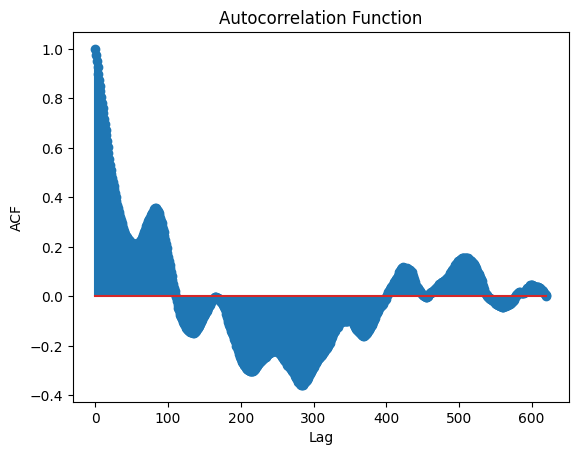

In [ ]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

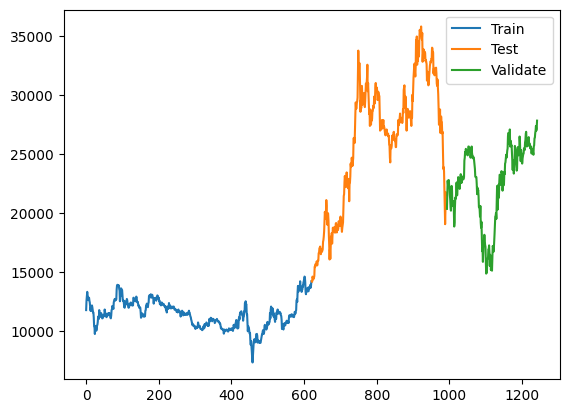

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[12000], [12550], [13150], [13450], [13350], [13100], [12900], [12950], [12950], [12800], [12600], [12550], [11950], [12000], [12000], [12050], [12350], [12050], [12200], [11850], [11700], [11550], [11250], [10650], [10350], [10400], [10750], [10600], [10300], [10450], [10500], [10700], [10800], [11200], [11200], [11100], [11750], [11800], [11550], [11350], [11400], [11550], [11700], [11550], [11300], [11300], [11350], [11250], [11350], [11650], [11350], [11800], [11850], [11750], [11400], [11600], [11300], [11300], [11600], [11500], [11450], [11550], [11550], [11550], [11550], [11550], [11400], [11250], [11200], [11500], [11800], [11850], [12300], [12200], [12200], [12050], [12400], [12750], [12650], [12900], [12850], [12800], [12900], [12850], [13500], [14400], [14050], [14050], [13950], [14300], [13950], [13950], [13600], [13100], [13100], [13200], [13600], [13900], [13850], [13600], [13500], [12950], [12850], [12650], [12750], [12350], [12300], [12500], [12600], [12550], [12400], 

C:\Users\giangle\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydlm\modeler\autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [ ]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]



(372, 1)


In [ ]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[21388.971087267713, 18689.623622981497, 21721.587067331213, 20163.064699232265, 21117.525242155483, 20870.18654177958, 20837.93948531777, 20650.296150622704, 20553.126712459296, 19866.09490279461, 19867.915813244603, 18869.12404954263, 20359.722476506424, 20381.48631677108, 20861.858817400956, 19629.068784993688, 19846.199507509897, 19414.810307795964, 19837.7937620284, 18812.317439775576, 19378.754947000998, 18074.42123438546, 19491.432940885967, 20004.079960565134, 20097.370349900688, 20082.774104514046, 21194.611667309568, 21190.705540094546, 20863.688135408116, 20277.660529902572, 21327.29539142132, 21510.981697387564, 21398.069753689837, 21220.099855775465, 21228.774286113585, 20535.300493141065, 21225.411494596072, 21440.175482211394, 21359.72271875023, 21835.367420545506, 21337.807844881467, 21326.720840081838, 21674.149562517574, 21558.614358851693, 21627.022362106316, 21361.46379048628, 21100.064145707074, 21282.494079531545, 22795.454077690192, 22476.163496464

In [ ]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1304.4490058503861
Testing RMSE: 1706.4218840147898
Validation MAPE: 5.003149242877345
Testing MAPE: 5.330556222976498
Validation MAE: 1173.2185540572466
Testing MAE: 1490.1763111462644


In [ ]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[10242.12978054 10240.67627656 10239.22277258 10237.76926859
 10236.31576461 10234.86226063 10233.40875665 10231.95525267
 10230.50174869 10229.04824471 10227.59474073 10226.14123674
 10224.68773276 10223.23422878 10221.7807248  10220.32722082
 10218.87371684 10217.42021286 10215.96670887 10214.51320489
 10213.05970091 10211.60619693 10210.15269295 10208.69918897
 10207.24568499 10205.79218101 10204.33867702 10202.88517304
 10201.43166906 10199.97816508]


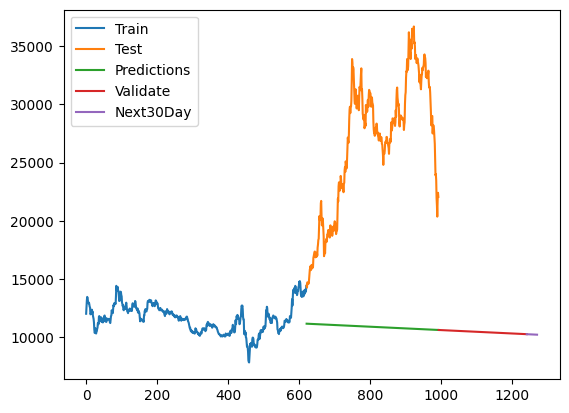

In [ ]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[10017.708249776542, 11642.32815348998, 10576.459651388728, 11047.397021704584, 10841.426467421277, 10928.71591427, 10852.088295668798, 10902.819032520967, 10910.12433985911, 10901.646449146037, 10955.951592854895, 10858.442464512116, 10982.225077782403, 10890.203246968229, 10914.079103812343, 10909.282358456045, 10947.475274534116, 10921.87104598213, 10985.686721984468, 10882.900037311823, 11009.61225253089, 10915.964444338648, 10940.742814090912, 10935.44513910837, 10973.916095266473, 10948.15754231493, 11012.058875431792, 10909.224647220495, 11035.963251257414, 10942.300796081652]


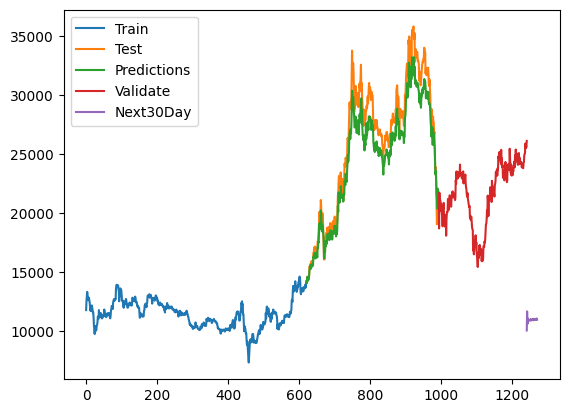

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()